# Homework 2: Data tables

This homework assignment is designed to get you comfortable loading and working with data tables.

You will need to download the **LexicalData_toclean.csv** file from the *Homework/lexDat* folder in the class GitHub repository. 

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides the reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not.

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. **Loading the Data (1 point)** 

Use the `setwd` and `read.csv` functions to load the data table from the **LexicalData_toclean.csv** file. Use the `head` function to look at the first few rows of the data. 

In [7]:
# INSERT CODE HERE
# If you are running this on your local computer, wet your workign directory to 
# the location of the lexDat data by setting your harddrive. Uncomment this line
# and change the location to where it is on your computer. 
#setwd("~/Documents/PittCMU/G3/DSPN/DataSciencePsychNeuro/Homeworks/lexDat")

# If you are running this on Colab, then use something like this.
# system("gdown --id 1wSvRPME5NimUDa0t3WqNSGzimLB1uNa7")
 
library("tidyverse")
library("dplyr")



setwd("~/Desktop/DataSciencePsychNeuro/Homeworks/lexDat/")
LexicalData_toclean <- read.csv("~/Desktop/DataSciencePsychNeuro/Homeworks/lexDat/LexicalData_toclean.csv")
head(LexicalData_toclean)


,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore
,<int>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>
1,157,1,1,710,browse,false,-0.437
2,67,1,1,"1,094",refrigerant,false,0.825
3,120,1,1,587,gaining,false,-0.645
4,21,1,1,984,cheerless,false,0.025
5,236,1,1,577,pattered,false,-0.763
6,236,2,1,715,conjures,false,-0.364


The **LexicalData_toclean.csv** file contains the variables `Sub_ID` (Subject ID), `Trial` (the trial number), `D_RT` (reaction time) and `D_Word` (the word they were responding to).

---
## 2. **Data Cleansing (4 points)**

There are three things we want to do to make this data more useable:
* Get rid of the commas in the reaction time values, and make this variable numeric (hint: check out the functions `gsub` and `as.numeric`).
* Get rid of rows where the reaction times are missing (hint: you can use the `filter` function from `tidyverse`, but you'll need to load the library).
* Make sure all of the reaction times are positive. 

Write code that will copy the data to a new variable and make the above changes. 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    3.0   579.0   699.0   807.3   907.0  3994.0 

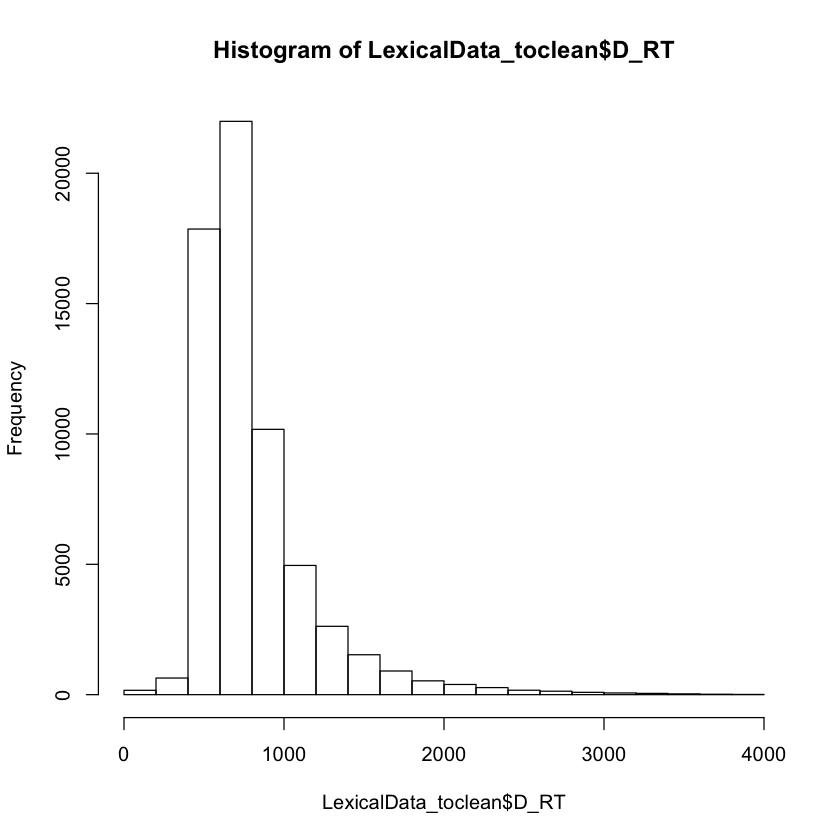

In [8]:
## Get rid of the commas in the reaction time values, and make this variable numeric 
LexicalData_toclean$D_RT <- as.numeric(gsub(",","",LexicalData_toclean$D_RT))

## Get rid of rows where the reaction times are missing
LexicalData_toclean %>% filter(D_RT!="") ->LexicalData_toclean

## Make sure all of the reaction times are positive
hist(LexicalData_toclean$D_RT)
summary (LexicalData_toclean$D_RT)

For each of the three actions above, is it addressing a data anomaly (as described in the Müller reading)? If so, name the *type* of anomaly it's addressing. 


> * First action: Domain Format?? (included commas in some of reaction times, which does not match domain of reaction time)

> * Second action: Coverage - Missing Value

> * Third action:  Semantic - Integrity Constraint Violation (wouldn't be possible for someone to have a negative RT)

---
## 3. **Data Manipulation with Tidyverse (4 points)**

Now let's use `tidyverse` functions to play around with this data a bit. Use the piping operator (`%>%`) in both of these code cells. 

First, let's get some useful summary **statistics** using `summarise`. Output a table that tells us how many observations there are in the data set, as well as the mean and standard deviation of the reaction times.

In [9]:
###First, let's get some useful summary statistics using summarise. Output a table that tells us how many observations there are in the data set, 
## as well as the mean and standard deviation of the reaction times.

LexicalData_toclean %>% summarise(count = n(),
                                  Average_RT = mean(D_RT),
                                  StandardDeviation_RT = sd(D_RT))



count,Average_RT,StandardDeviation_RT
<int>,<dbl>,<dbl>
62607,807.2667,377.4396


In [ ]:
Now, we'll use `mutate` to re-number the trials, starting from 0 instead of 1. Make a new variable that is equal to the `Trial` variable minus one. 

In [10]:
##Now, we'll use mutate to re-number the trials, starting from 0 instead of 1.
##Make a new variable that is equal to the Trial variable minus one.

LexicalData_toclean %>% mutate(LexicalData_toclean,NewTrial = Trial - 1)->LexicalData_toclean


---
## 4. **Plotting Data (1 point)**

Use the `plot()` function to visualize the data, in a way that helps you see if there's a relationship between `D_RT` and your new trial variable.

[1] 0.02473218

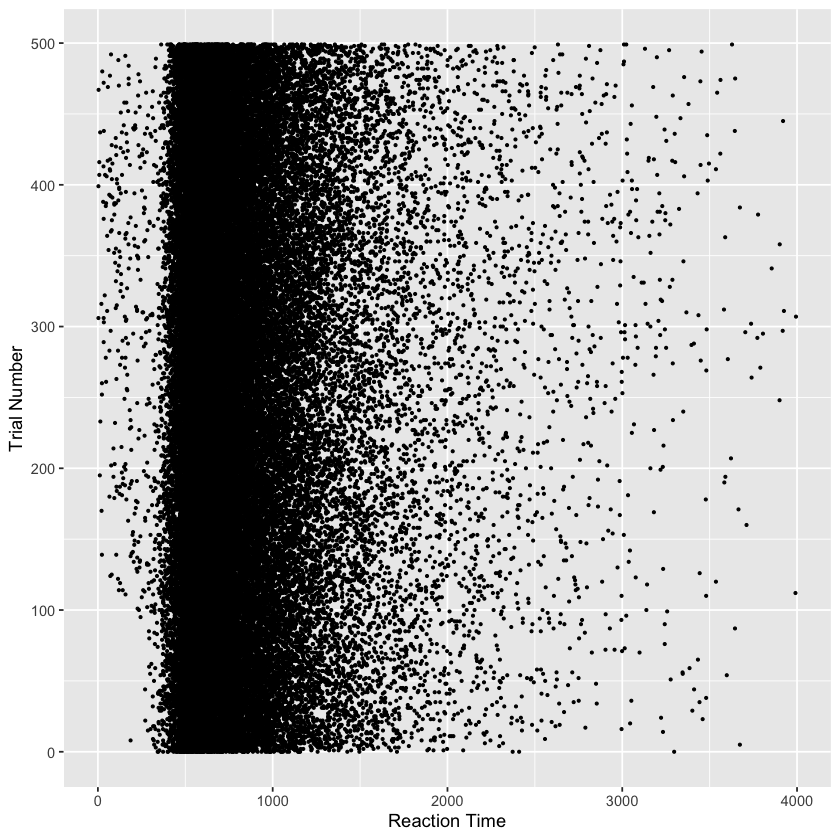

In [11]:
## Use the plot() function to visualize the data, in a way that helps you see 
## if there's a relationship between D_RT and your new trial variable

ggplot(LexicalData_toclean, aes(x=D_RT, y=NewTrial)) + geom_point(size=0.5) + scale_x_continuous(name = "Reaction Time" ) +
  scale_y_continuous(name = "Trial Number")

##doesn't appear to be a relationship between the two 

cor(LexicalData_toclean$D_RT, LexicalData_toclean$Trial)


That's all for Homework 2! When you are finished, save the notebook as Homework2.ipynb, push it to your class GitHub repository (the one you made for Homework 1) and send the instructors a link to your notebook via Canvas. You can send messages via Canvas by clicking "Inbox" on the left and then pressing the icon with a pencil inside a square.

**DUE:** 5pm EST, Feb 14, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*